### Metody numeryczne 1 - Lista 5

#### Zadanie 1:

Gęstość powietrza zmienia się z wysokością $h$ w następujący sposób:



|<span style="font-weight:normal">$$h(\textrm{km})$$</span>| <span style="font-weight:normal">0 </span>|<span style="font-weight:normal"> 3 </span>| <span style="font-weight:normal">6</span> |
|--|---|---|---|
|$$\rho(\textrm{kg/m}^3)$$| 1.225 | 0.905 | 0.652|


Wyraź $\rho(h)$ jako funkcję kwadratową h

#### Rozwiązanie:

p(h) = 1.0*h^2 + 1.0000000000000007*h + 1.0 



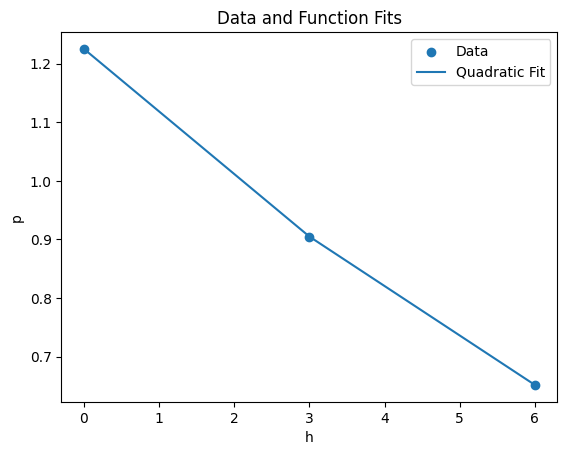

In [5]:
# Mateusz Wójcicki ISSP sem3

import numpy as np
import matplotlib.pyplot as plt

# Building arrays to get parameters a, b and c
A = np.array([[0, 0, 1.225], [9, 3, 0.905-9-3], [36, 6, 0.652-36-6]])
b = np.array([1.225, 0.905,  0.652])

# Solving equations using numpy method
x = np.linalg.solve(A, b)

print(f"p(h) = {x[0]}*h^2 + {x[1]}*h + {x[2]} \n")


# Plotting function p(h)
h = np.array([0, 3, 6])
p = np.array([1.225, 0.905,  0.652])

# Quadratic fit
quadratic_coeffs = np.polyfit(h, p, 2)
quadratic_fit = np.poly1d(quadratic_coeffs)

# Plotting the data and the fits
plt.scatter(h, p, label='Data')
plt.plot(h, quadratic_fit(h), label='Quadratic Fit')
plt.legend()
plt.xlabel('h')
plt.ylabel('p')
plt.title('Data and Function Fits')
plt.show()

#### Zadanie 2:

Oblicz $y'(x)$ w $x=2.1$ oraz pierwiastki $y(x)$ korzystając z następujących danych:

|<span style="font-weight:normal"> x</span> | <span style="font-weight:normal"> 1</span> | <span style="font-weight:normal"> 1.25</span> | <span style="font-weight:normal"> 1.5</span> | <span style="font-weight:normal"> 1.75</span> | <span style="font-weight:normal"> 2</span> |  <span style="font-weight:normal"> 2.25</span> | <span style="font-weight:normal"> 2.5</span> | <span style="font-weight:normal"> 2.75</span> | <span style="font-weight:normal"> 3</span> |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$$y$$| -0.5403| -0.0104| 0.9423| 1.7445| 1.3073| -0.7718| -2.4986| -0.7903| 2.7334|


#### Rozwiązanie:

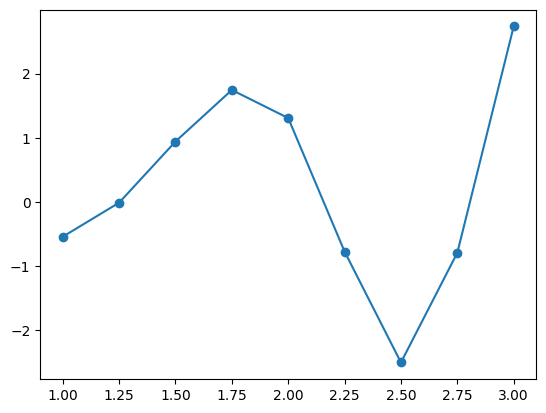



coefficients:
 [ 3.35173080e+00 -6.17405360e+01  4.68869547e+02 -1.93299015e+03
  4.76271266e+03 -7.22642420e+03  6.63227013e+03 -3.38041328e+03
  7.33823801e+02]

 function pattern:
        8         7         6        5        4        3        2
3.352 x - 61.74 x + 468.9 x - 1933 x + 4763 x - 7226 x + 6632 x - 3380 x + 733.8

All Roots: 
 [5.66650725+0.j         3.14996904+0.j         2.79978442+0.j
 2.17025583+0.j         1.23956721+0.49988138j 1.23956721-0.49988138j
 1.25297911+0.j         0.9018636 +0.j        ]


y'(2.1) =  -917.9557007143067


In [14]:
x = []
for i in range(0, 9):
    x.append(1 + 0.25*i)

y = [-0.5403, -0.0104, 0.9423, 1.7445, 1.3073, -0.7718, -2.4986, -0.7903, 2.7334]

# Ploting points to get to know what type of function y(x) is. 
plt.scatter(x, y, label='Data')
quadratic_coeffs = np.polyfit(x, y, 8)
quadratic_fit = np.poly1d(quadratic_coeffs)
plt.plot(x, quadratic_fit(x), label='Quadratic Fit')
plt.show()

# I concluded that 8'th degree polynomial fits to the points best

print("\n\ncoefficients:\n", quadratic_coeffs)
print("\n function pattern:\n", np.poly1d(quadratic_fit))

# Finding roots of y(x) function
print("\nAll Roots: \n", np.roots(np.poly1d(quadratic_fit)))

# Finding value of y'(x) for x = 2.1
yy = np.diff(quadratic_coeffs)

print("\n\ny'(2.1) = " , np.poly1d(yy)(2.1))

#### Zadanie 3:
W poniższej tabeli przedstawiony jest współczynnik oporu $c_D$ sfery w cieczy jako funkcja liczby Reynoldsa $Re$. Korzystając z naturalnych funkcji sklejanych, znajdź $c_D$ dla $Re$ = 5, 50 i 5000

|<span style="font-weight:normal">$$Re$$</span>| <span style="font-weight:normal">0.2 </span>|<span style="font-weight:normal"> 2 </span>| <span style="font-weight:normal">20</span> |<span style="font-weight:normal">200</span> |<span style="font-weight:normal">2000</span> |<span style="font-weight:normal">20000</span> |
|:--:|:---:|:---:|:---:|:---:|:---:|:---:|
|$$c_D$$| 103 | 13.9 | 2.72| 0.8| 0.401| 0.433|

*Wskazówka:* Użyj podwójnie logarytmicznej skali
#### Rozwiązanie:

Predicted cD for Re=5: 6.550223938768654
Predicted cD for Re=50: 1.343090006569207
Predicted cD for Re=5000: 0.5698072191611956


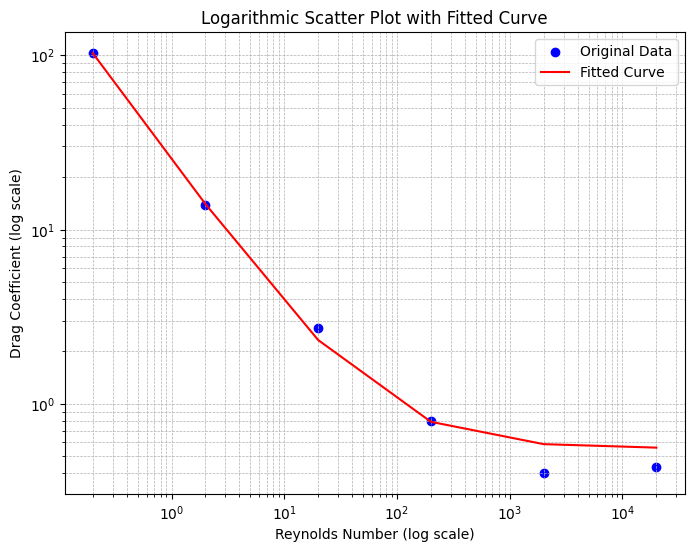

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Re = np.array([0.2, 2, 20, 200, 2000, 20000])
cD = np.array([103, 13.9, 2.72, 0.8, 0.40, 0.433])

# Defining the curve-fitting function
def fit_function(Re, a, b, c):
    return a * np.power(Re, -b) + c

# Fitting the curve to the data
params, covariance = curve_fit(fit_function, Re, cD)

# Extracting the parameters
a, b, c = params

# Reynolds numbers for prediction
Re_pred = np.array([5, 50, 5000])

# Predicting cD values using the fitted curve
cD_pred = fit_function(Re_pred, a, b, c)

# Printing the predicted cD values
for re, cd_pred in zip(Re_pred, cD_pred):
    print(f'Predicted cD for Re={re}: {cd_pred}')

# Ploting the original data and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(Re, cD, label='Original Data', marker='o', color='blue')
plt.plot(Re, fit_function(Re, a, b, c), label='Fitted Curve', color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Reynolds Number (log scale)')
plt.ylabel('Drag Coefficient (log scale)')
plt.title('Logarithmic Scatter Plot with Fitted Curve')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


#### Zadanie 4:

Rozwiąż zad. 3 za pomocą interpolacji wielomianowej.

#### Rozwiązanie:

Predicted cD for Re=5: 6.515228055165396
Predicted cD for Re=50: 1.5722614032290734
Predicted cD for Re=5000: 0.39243020800319994


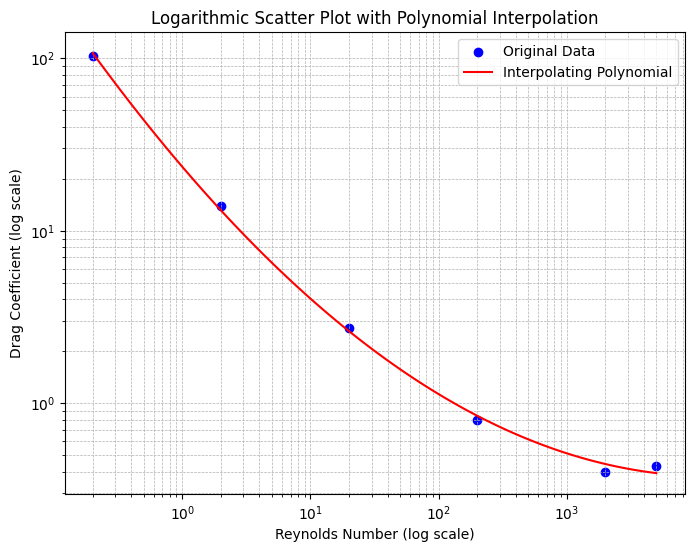

In [19]:
import numpy as np
import matplotlib.pyplot as plt

Re = np.array([0.2, 2, 20, 200, 2000, 5000])
cD = np.array([103, 13.9, 2.72, 0.8, 0.40, 0.433])

# Polynomial interpolation
degree = 2  # You can adjust the degree as needed
coefficients = np.polyfit(np.log(Re), np.log(cD), degree)

# Defining the interpolating function
poly_interpolator = np.poly1d(coefficients)

# Reynolds numbers for prediction
Re_pred = np.array([5, 50, 5000])

# Predicting cD values using the interpolating function
cD_pred = np.exp(poly_interpolator(np.log(Re_pred)))

# Printing the predicted cD values
for re, cd_pred in zip(Re_pred, cD_pred):
    print(f'Predicted cD for Re={re}: {cd_pred}')

# Ploting the original data and the interpolating polynomial
plt.figure(figsize=(8, 6))
plt.scatter(Re, cD, label='Original Data', marker='o', color='blue')
Re_range = np.logspace(np.log10(min(Re)), np.log10(max(Re)), 100)
plt.plot(Re_range, np.exp(poly_interpolator(np.log(Re_range))), label='Interpolating Polynomial', color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Reynolds Number (log scale)')
plt.ylabel('Drag Coefficient (log scale)')
plt.title('Logarithmic Scatter Plot with Polynomial Interpolation')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

#### Zadanie 5:

Dopasuj linię prostą i funkcję kwadratową do poniższych danych:

|<span style="font-weight:normal">$$x$$</span>| <span style="font-weight:normal">1.0 </span>|<span style="font-weight:normal"> 2.5 </span>| <span style="font-weight:normal">3.5</span> |<span style="font-weight:normal">4.0</span> |<span style="font-weight:normal"> 1.1</span> |<span style="font-weight:normal">1.8</span> |<span style="font-weight:normal">2.2</span> |<span style="font-weight:normal">3.7</span> |
|:--:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|$$y$$| 6.008 | 15.722 | 27.13 | 33.772 | 5.257 | 9.549 |11.098 |28.828|

Która funkcja jest lepiej dopasowana do tych danych?

#### Rozwiązanie:

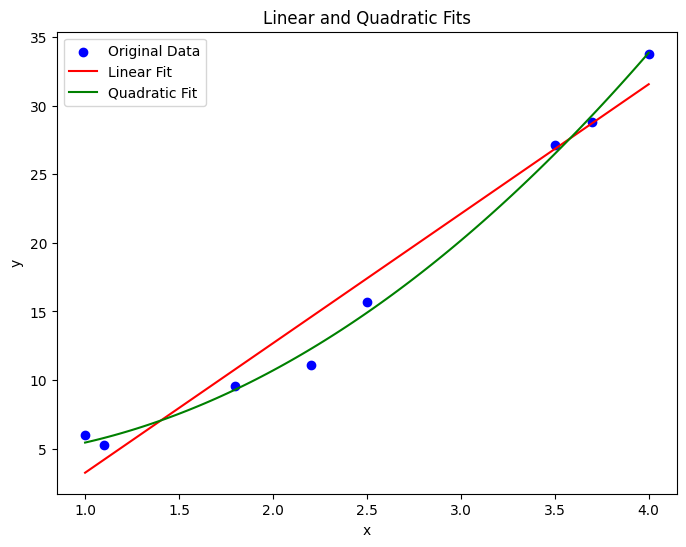

In [20]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1.0, 2.5, 3.5, 4.0, 1.1, 1.8, 2.2, 3.7])
y = np.array([6.008, 15.722, 27.13, 33.772, 5.257, 9.549, 11.098, 28.828])

# Fitting a straight line 
line_coefficients = np.polyfit(x, y, 1)
line_fit = np.poly1d(line_coefficients)

# Fitting a quadratic function 
quadratic_coefficients = np.polyfit(x, y, 2)
quadratic_fit = np.poly1d(quadratic_coefficients)

# Generating x values for smooth curves
x_smooth = np.linspace(min(x), max(x), 100)

# Plotting the original data and the fitted curves
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Original Data', marker='o', color='blue')
plt.plot(x_smooth, line_fit(x_smooth), label='Linear Fit', color='red')
plt.plot(x_smooth, quadratic_fit(x_smooth), label='Quadratic Fit', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear and Quadratic Fits')
plt.legend()
plt.show()

# Lepiej dopaowaną funkcją w tym przypadku okazuje się funkcja kwadratowa

#### Zadanie 6:

Wykorzystaj pomiary względnej gęstości powietrza $\rho$ na wysokości $h$(km)



|<span style="font-weight:normal">$$h(\textrm{km})$$</span>| <span style="font-weight:normal">0 </span>|<span style="font-weight:normal"> 1.525 </span>| <span style="font-weight:normal">3.05</span> |<span style="font-weight:normal">4.575</span> |<span style="font-weight:normal">6.1</span> |<span style="font-weight:normal">7.625</span> |<span style="font-weight:normal">9.150</span> |
|:--:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|$$\rho(\textrm{kg/m}^3)$$| 1 | 0.8617 | 0.7385 | 0.6292 | 0.5328 |0.4481 |0.3741|

do obliczenia $\rho$ na wysokości $h=10.5\,$km. *Wskazówka*: Dopasuj do tych danych
funkcję kwadratową metodą najmniejszych kwadratów.

#### Rozwiązanie:

Predicted ro for h=10.5: 0.3223424297103943




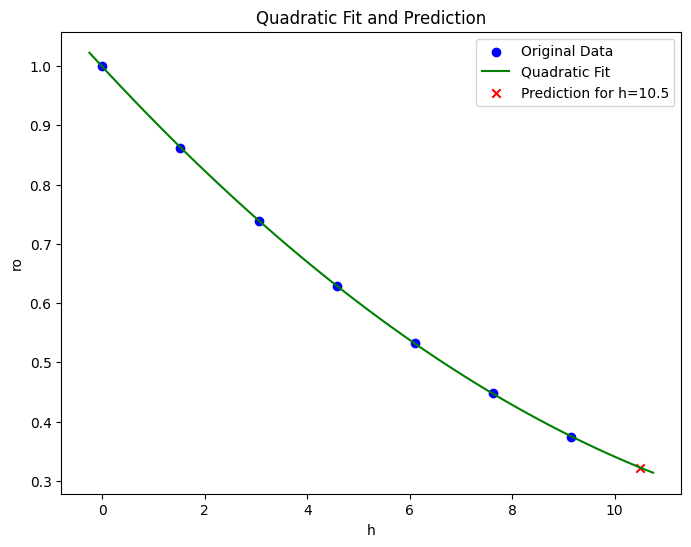

In [21]:
import numpy as np
import matplotlib.pyplot as plt

h = np.array([0, 1.525, 3.05, 4.575, 6.1, 7.625, 9.150])
ro = np.array([1, 0.8617, 0.7385, 0.6292, 0.5328, 0.4481, 0.3741])

# Fiting a quadratic function 
quadratic_coefficients = np.polyfit(h, ro, 2)
quadratic_fit = np.poly1d(quadratic_coefficients)

# Generatting h value for prediction
h_pred = 10.5

# Predicting ro using the quadratic fit
ro_pred = quadratic_fit(h_pred)

# Printing the predicted ro value
print(f'Predicted ro for h={h_pred}: {ro_pred}\n\n')

# Plotting the original data and the fitted quadratic curve
plt.figure(figsize=(8, 6))
plt.scatter(h, ro, label='Original Data', marker='o', color='blue')
h_smooth = np.linspace(min(h)-0.25, 10.75, 100)
plt.plot(h_smooth, quadratic_fit(h_smooth), label='Quadratic Fit', color='green')
plt.scatter(h_pred, ro_pred, color='red', marker='x', label=f'Prediction for h={h_pred}')
plt.xlabel('h')
plt.ylabel('ro')
plt.title('Quadratic Fit and Prediction')
plt.legend()
plt.show()
